In [51]:
from __future__ import print_function
from IPython.core.magic import Magics, magics_class, line_magic, cell_magic
from IPython.core import interactiveshell


def load(fname, block=None):
    with open(fname) as f:
            source = f.read()
            
    if block:
        left = "##START %s" % block
        right = "##END %s" % block
        source = source[source.index(left)+len(left):source.index(right)]
        
    source = source.strip()

    return source
    

@magics_class
class MyMagics(Magics):
    
    @register_line_cell_magic
    @magic_arguments.magic_arguments()
    @magic_arguments.argument('--file', '-f',
          action='store_true',
          help='What file to be used'
    )
    def my_load_cell(self, line, cell=None):
        
        print(line)
        print(cell)
        
        line = line.replace('\'', '').replace("\"", '')
        fname, block = line.split(":")
        source = load(fname, block)
        header = "%run_and_load '{}'".format(line)
        self.shell.set_next_input("%s\n\n%s" % (header, source), replace=True)
        self.shell.run_cell(source)

    @line_magic
    def run_and_load(self, line):
        line = line.replace('\'', '').replace("\"", '')
        fname, block = line.split(":")
        source = load(fname, block)
        header = "%run_and_load '{}'".format(line)
        self.shell.set_next_input("%s\n\n%s" % (header, source), replace=True)
        self.shell.run_cell(source)
        
    @line_magic
    def my_load(self, line):
        self.shell.set_next_input("" % (header, source), replace=True)
        line = line.replace('\'', '').replace("\"", '')
        fname, block = line.split(":")
        source = load(fname, block)
        header = "%my_load '{}'".format(line)
        self.shell.set_next_input("%s\n\n%s" % (header, source), replace=True)

    @line_magic
    def my_run(self, line):
        line = line.replace('\'', '').replace("\"", '')
        fname, block = line.split(":")
        source = load(fname, block)
        self.shell.run_cell(source)


        
ip = get_ipython()
ip.register_magics(MyMagics)



NameError: name 'magic_arguments' is not defined

In [48]:
%%my_load_cell 'crossover.py:SBX1'





None


ValueError: not enough values to unpack (expected 2, got 1)

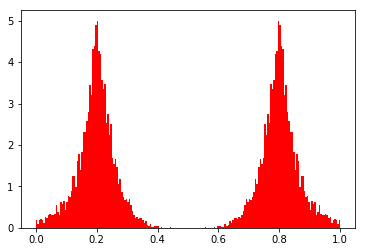

In [20]:
%my_run 'crossover.py:SBX1'